In [1]:
import cv2
import matplotlib.pyplot as plt
import cython
%load_ext cython
import cython

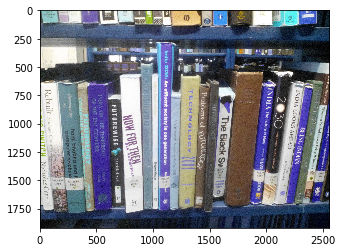

In [2]:
#Load Image
image=cv2.imread("image.jpg")
plt.imshow(image)
# Write the modified image 
cv2.imwrite("temp.jpeg", image,[cv2.IMWRITE_JPEG_QUALITY,90])
resaved_img = cv2.imread("temp.jpeg")
#Split the image into channels
orig_b,orig_g,orig_r = cv2.split(image)
comp_b,comp_g,comp_r = cv2.split(resaved_img)
#Find the absolute difference between the original and the compressed image
diff_b=abs(comp_b-orig_b)
diff_g=abs(comp_g-orig_g)
diff_r=abs(comp_r-orig_r)
#Merge the channels
diff_img=cv2.merge([diff_b,diff_g,diff_r])
#Creating another copy of the image
copy_diff_img=diff_img.copy()

In [3]:
%%cython -a
def func(output_img):   
    scale=30
    for row in range(0,output_img.shape[0]):
        for column in range(0,output_img.shape[1]):
            for channel in range(0,output_img.shape[2]):
                output_img[row][column][channel]*=scale
    return output_img

1 loop, best of 3: 1min 13s per loop


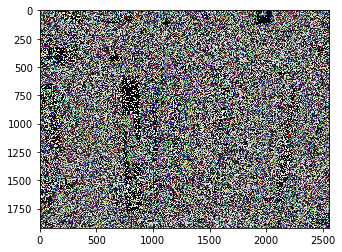

In [4]:
%timeit plt.imshow(func(diff_img))

In [5]:
%%cython -a
 
import cython
 
@cython.boundscheck(False)
cpdef unsigned char[:, :,:] func_fast(unsigned char [:,:, :] output_img):
    cdef int scale=30
    for row in range(0,output_img.shape[0]):
        for column in range(0,output_img.shape[1]):
            for channel in range(0,output_img.shape[2]):
                output_img[row,column,channel]*=scale
    return output_img

1 loop, best of 3: 242 ms per loop


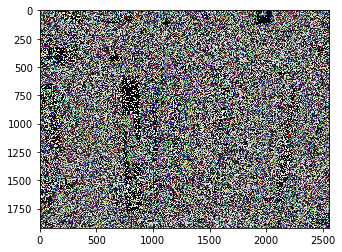

In [6]:
%timeit plt.imshow(func_fast(copy_diff_img))